In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.isna().sum()
#There is not a null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df["sex"]= df["sex"].astype("category")


In [ ]:
df["smoker"]= df["smoker"].astype("category")


In [ ]:

df["region"]= df["region"].astype("category")

In [ ]:
df["sex"].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [ ]:
df["smoker"].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


** The distribution of Bmi**

As you can see in the above mean of bmi is 30.66. Max value is 53.13 and min value is 15.96. Standard deviation is not high which is preferable. The histogram and the box plot of the data is given above.


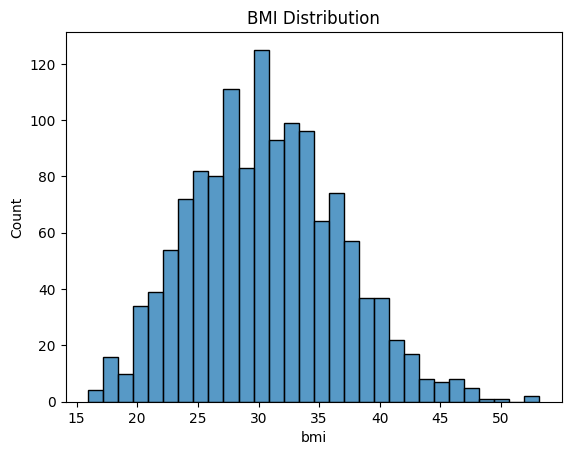

In [ ]:
sns.histplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

<Axes: xlabel='bmi'>

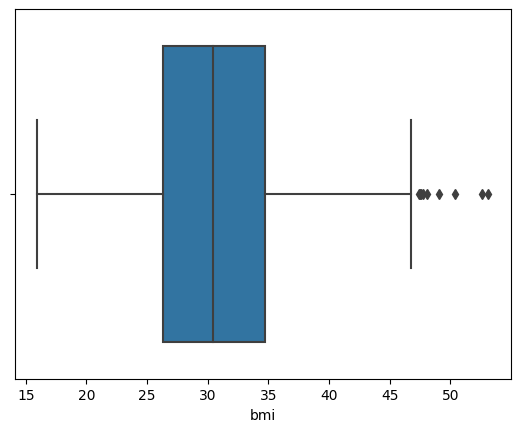

In [ ]:
sns.boxplot(x = "bmi", data= df)

As we can see from the box plot there are several outliers in the bmi data.

** The relationship between “smoker” and “charges”**





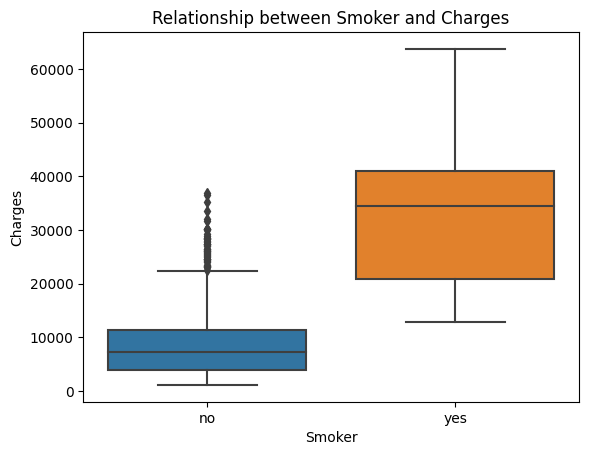

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoker and Charges')
plt.show()


As we can see from the box plot, the ones who smoke charge more.

**The relationship between “smoker” and “region”.**

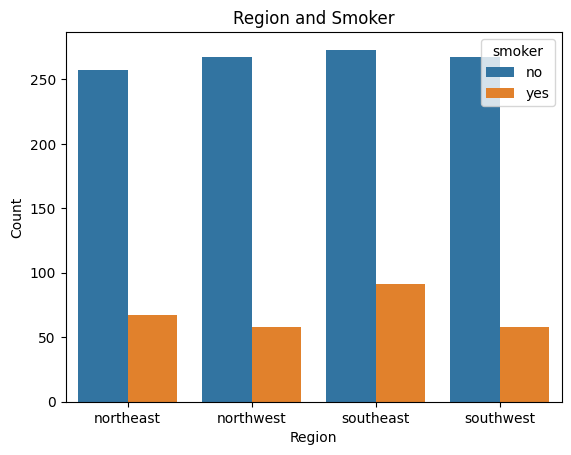

In [ ]:
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

The maximum number of smokers and non-smokers are located in the southeast. Smoker / non-smoker ratio is also max in this region.


**The relationship between “bmi” and “sex”**

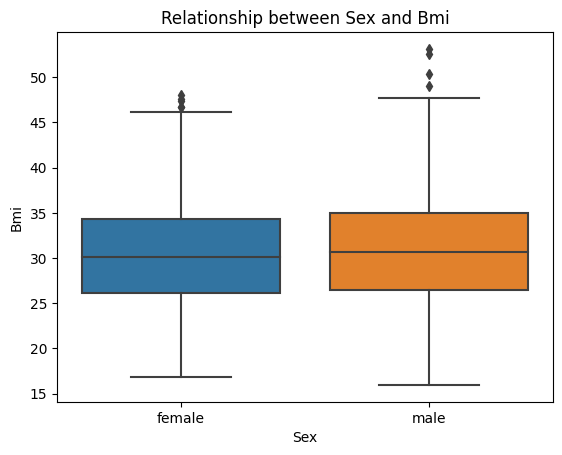

In [ ]:
sns.boxplot(x='sex', y='bmi', data=df)
plt.xlabel('Sex')
plt.ylabel('Bmi')
plt.title('Relationship between Sex and Bmi')
plt.show()


Male bmi average is more than the female bmi average.

**The "region" with the most "children"**

In [ ]:
grouped = df.groupby('region')['children'].sum()
region_with_most_children = grouped.idxmax()
most_children_count = grouped.max()

print(f"The region with the most children is {region_with_most_children} with {most_children_count} children.")

The region with the most children is southeast with 382 children.


The relationship between “age” and “bmi”.

In [ ]:
correlation_coefficient = df['age'].corr(df['bmi'])
print(f"Correlation Coefficient between Age and BMI: {correlation_coefficient:.2f}")

Correlation Coefficient between Age and BMI: 0.11


As age increases, the BMI tends to increase as well, but the relationship is not very strong. There is a weak positive correlation.

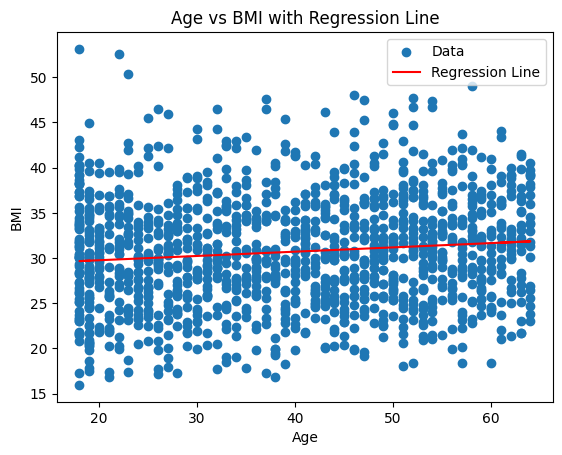

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['age']]
y = df['bmi']

model = LinearRegression()
model.fit(X, y)

plt.scatter(df['age'], df['bmi'], label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI with Regression Line')
plt.legend()
plt.show()

Using the regression line we can see that as the age increases the bmi increases.


**The relationship between “bmi” and “children”.**

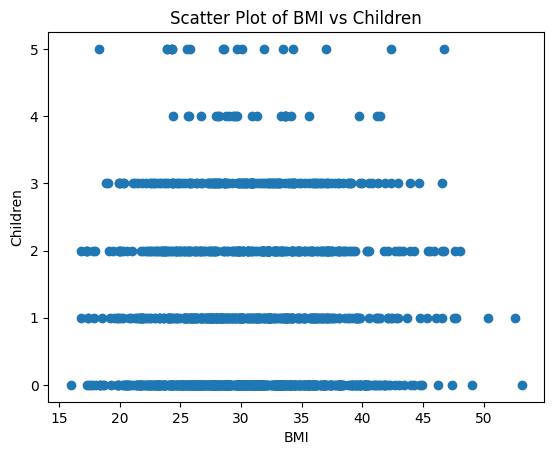

In [ ]:
plt.scatter(df['bmi'], df['children'])
plt.xlabel('BMI')
plt.ylabel('Children')
plt.title('Scatter Plot of BMI vs Children')
plt.show()

In [ ]:
correlation_coefficient = df['bmi'].corr(df['children'])
print(f"Correlation Coefficient between BMI and Children: {correlation_coefficient:.2f}")

Correlation Coefficient between BMI and Children: 0.01


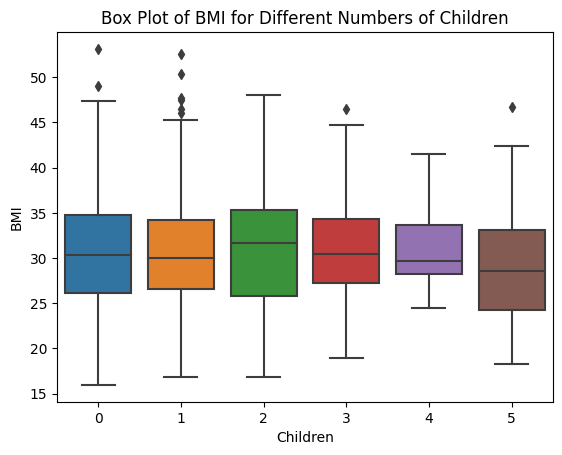

In [ ]:
sns.boxplot(x=df['children'], y=df['bmi'])
plt.xlabel('Children')
plt.ylabel('BMI')
plt.title('Box Plot of BMI for Different Numbers of Children')
plt.show()


Yes there are where the number of children is 0,1,3, and 5.

Is there an outlier in the "bmi" variable?

<Axes: xlabel='bmi'>

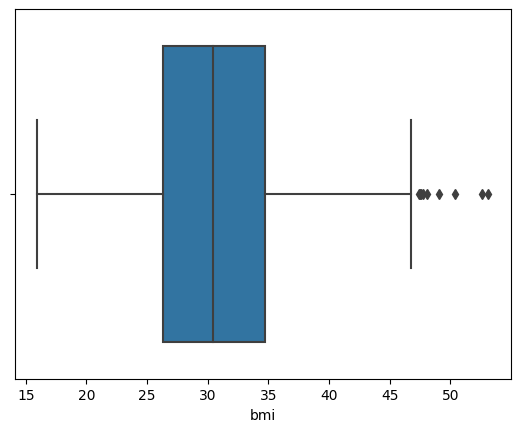

In [ ]:
sns.boxplot(x = "bmi", data= df)

As it can be seen there are outliars in the bmi data.

**the relationship between “bmi” and “charges”.**

In [ ]:
correlation_coefficient = df['bmi'].corr(df['charges'])
print(f"Correlation Coefficient between BMI and Charges: {correlation_coefficient:.2f}")

Correlation Coefficient between BMI and Charges: 0.20


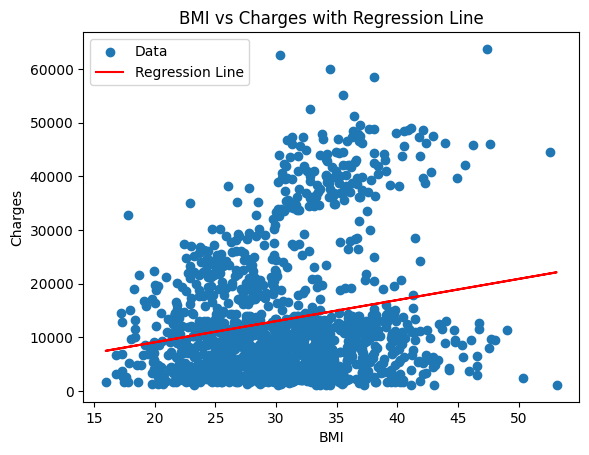

In [ ]:
X = df[['bmi']]
y = df['charges']

model = LinearRegression()
model.fit(X, y)


plt.scatter(df['bmi'], df['charges'], label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges with Regression Line')
plt.legend()
plt.show()

The charges are not linearly dependent on the BMI as can be seen in the plot.



 **The relationship between “region”, “smoker” and “bmi”**


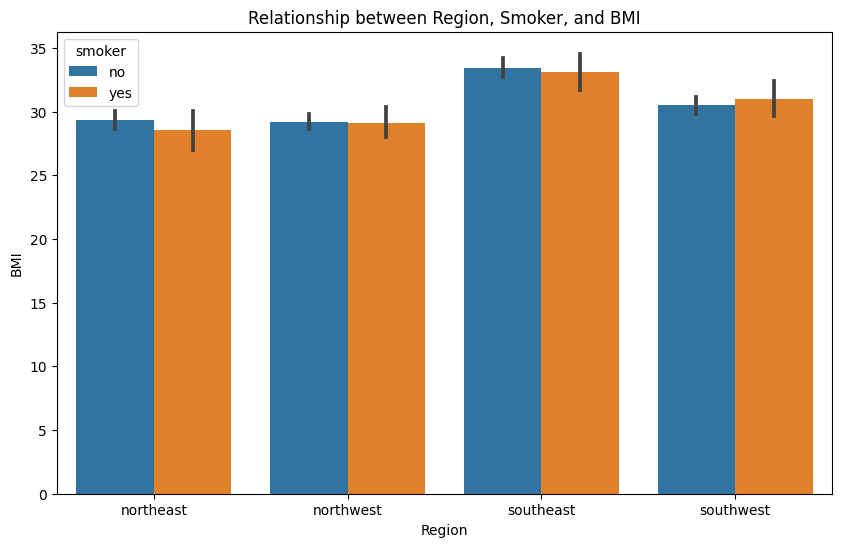

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="bmi", hue="smoker", data=df)
plt.xlabel('Region')
plt.ylabel('BMI')
plt.title('Relationship between Region, Smoker, and BMI')
plt.show()


The non-smokers located in the southeast, northeast and the northwest region have higher bmi's than the smokers in those regions.


**4. DATA PREPROCESSING**

In [ ]:
df2 = insurance.copy()
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
sex = df.iloc[:, 1:2].values
print(sex)

[['female']
 ['male']
 ['male']
 ...
 ['female']
 ['female']
 ['female']]


In [ ]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
sex = ohe.fit_transform(sex).toarray()
print(sex)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
changed_sex = pd.DataFrame(data = sex, index = range(1338), columns = ["Female", "Male"])
print(changed_sex)

      Female  Male
0        1.0   0.0
1        0.0   1.0
2        0.0   1.0
3        0.0   1.0
4        0.0   1.0
...      ...   ...
1333     0.0   1.0
1334     1.0   0.0
1335     1.0   0.0
1336     1.0   0.0
1337     1.0   0.0

[1338 rows x 2 columns]


In [ ]:
smoker = df.iloc[:, 4:5].values

from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
smoker = ohe.fit_transform(smoker).toarray()
changed_smoker = pd.DataFrame(data = smoker, index = range(1338), columns = ["No", "Yes"])
print(changed_smoker)

       No  Yes
0     0.0  1.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
1333  1.0  0.0
1334  1.0  0.0
1335  1.0  0.0
1336  1.0  0.0
1337  0.0  1.0

[1338 rows x 2 columns]


In [ ]:
region = df.iloc[:, 5:6].values

from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
region = ohe.fit_transform(region).toarray()
changed_region = pd.DataFrame(data = region, index = range(1338), columns = ["Northeast", "Northwest"," Southeast", "Southwest"])
print(changed_region)

      Northeast  Northwest   Southeast  Southwest
0           0.0        0.0         0.0        1.0
1           0.0        0.0         1.0        0.0
2           0.0        0.0         1.0        0.0
3           0.0        1.0         0.0        0.0
4           0.0        1.0         0.0        0.0
...         ...        ...         ...        ...
1333        0.0        1.0         0.0        0.0
1334        1.0        0.0         0.0        0.0
1335        0.0        0.0         1.0        0.0
1336        0.0        0.0         0.0        1.0
1337        0.0        1.0         0.0        0.0

[1338 rows x 4 columns]


In [226]:
age = df['age']
children = df['children']
changed_sex.iloc[:, 0:1]= changed_sex.iloc[:, 0:1].astype("float")
x = pd.concat([changed_sex.iloc[:, 0:1], changed_smoker.iloc[:, 0:1], changed_region, age, children], axis = 1)
print(x)

      Female   No  Northeast  Northwest   Southeast  Southwest  age  children
0        1.0  0.0        0.0        0.0         0.0        1.0   19         0
1        0.0  1.0        0.0        0.0         1.0        0.0   18         1
2        0.0  1.0        0.0        0.0         1.0        0.0   28         3
3        0.0  1.0        0.0        1.0         0.0        0.0   33         0
4        0.0  1.0        0.0        1.0         0.0        0.0   32         0
...      ...  ...        ...        ...         ...        ...  ...       ...
1333     0.0  1.0        0.0        1.0         0.0        0.0   50         3
1334     1.0  1.0        1.0        0.0         0.0        0.0   18         0
1335     1.0  1.0        0.0        0.0         1.0        0.0   18         0
1336     1.0  1.0        0.0        0.0         0.0        1.0   21         0
1337     1.0  0.0        0.0        1.0         0.0        0.0   61         0

[1338 rows x 8 columns]


In [ ]:
charges = df['charges']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, charges, test_size=0.33, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(x_train)
X_test_scale = scaler.transform(x_test)

**5. Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
regressor = LinearRegression()
regressor.fit(X_train_scale, y_train)

y_pred = regressor.predict(X_test_scale)

X = np.append(arr=np.ones((1338,1)).astype(int), values=x, axis=1)

X_list = x.iloc[:, [0]].values
X_list = np.array(X_list, dtype=float)

model = sm.OLS(charges, X_list).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.242
Model:                            OLS   Adj. R-squared (uncentered):              0.242
Method:                 Least Squares   F-statistic:                              427.5
Date:                Sat, 26 Aug 2023   Prob (F-statistic):                    1.25e-82
Time:                        20:17:13   Log-Likelihood:                         -14820.
No. Observations:                1338   AIC:                                  2.964e+04
Df Residuals:                    1337   BIC:                                  2.965e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


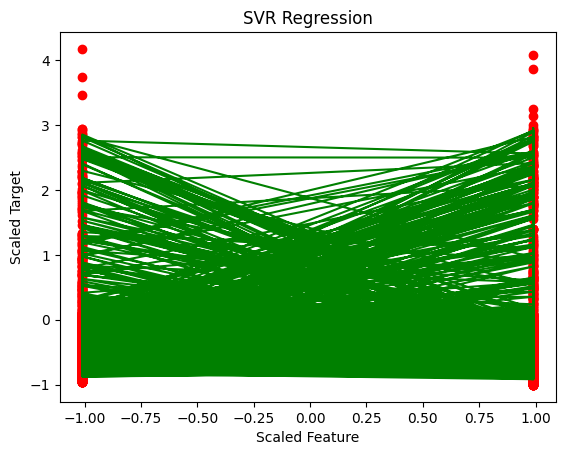

In [227]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("insurance.csv")

x = data.drop('charges', axis=1)
charges = data['charges']

df = pd.concat([x, charges], axis=1)

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categories = encoder.fit_transform(df[categorical_features])

x_encoded = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_features))
x_encoded[numerical_features] = df[numerical_features]

y = df['charges']

sc1 = StandardScaler()
x_scale = sc1.fit_transform(x_encoded)
sc2 = StandardScaler()
y_scale = sc2.fit_transform(y.values.reshape(-1, 1))


svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_scale, y_scale.ravel())


plt.scatter(x_scale[:, 0], y_scale, color='red')
plt.plot(x_scale[:, 0], svr_reg.predict(x_scale), color='green')
plt.title('SVR Regression')
plt.xlabel('Scaled Feature')
plt.ylabel('Scaled Target')
plt.show()



In [225]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = x
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

rf_model = RandomForestRegressor(n_estimators=200, random_state=0)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"MSE: {mse:.2f}")
print(f"R-sqr: {r2:.2f}")


MSE: 48895003.24
R-sqr: 0.69
